In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
df=pd.read_csv("C:/Users/spsha/Downloads/ogt.csv")

In [30]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
995,18278454,male,50,185,83,13,97,40.3,74
996,11963638,female,46,151,52,25,113,40.5,183
997,17277065,male,38,185,91,5,82,39.2,15
998,15906490,male,30,189,95,21,103,40.8,123


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     1000 non-null   int64  
 1   Gender      1000 non-null   object 
 2   Age         1000 non-null   int64  
 3   Height      1000 non-null   int64  
 4   Weight      1000 non-null   int64  
 5   Duration    1000 non-null   int64  
 6   Heart_Rate  1000 non-null   int64  
 7   Body_Temp   1000 non-null   float64
 8   Calories    1000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 70.4+ KB


In [32]:
# Shape of Dataset - (Num of Rows and Num of Columns)
df.shape
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 1000
Number of Columns: 9


In [33]:
df = df.drop(['User_ID'],axis=1)
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [34]:
# To ge all information about Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1000 non-null   object 
 1   Age         1000 non-null   int64  
 2   Height      1000 non-null   int64  
 3   Weight      1000 non-null   int64  
 4   Duration    1000 non-null   int64  
 5   Heart_Rate  1000 non-null   int64  
 6   Body_Temp   1000 non-null   float64
 7   Calories    1000 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


# Checking Missing values in dataset

In [35]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [36]:
df=df.drop(columns=['Gender','Age','Height','Weight','Heart_Rate','Body_Temp'])

In [37]:
df

,Duration,Calories
0,29,231
1,14,66
2,5,26
3,13,71
4,10,35
...,...,...
995,13,74
996,25,183
997,5,15
998,21,123


# K-Nearest Neighbor Algorithm

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

In [39]:
#Key Points:
#Data Inspection: It is important to inspect the data types of each column to identify which columns need encoding.
#One-Hot Encoding: Convert all categorical columns to numerical using one-hot encoding.
#Handle Missing Values: Ensure all missing values are handled appropriately.
#Standardization: Only standardize numeric columns to have a mean of 0 and a standard deviation of 1.
#Troubleshooting Tips:
#Check for Additional Categorical Data: Ensure there are no other string columns that need encoding.
#Missing Values: Confirm that missing values are filled appropriately to avoid NaNs.
#Data Types: Double-check that after encoding and filling missing values, all columns are numeric.
#By following these steps, you should be able to resolve the error and successfully apply the KNN algorithm to your dataset.
#If you still encounter issues, please provide more details or a sample of the dataset for further troubleshooting.

In [40]:
# Feature selection (exclude categorical and text features for simplicity)
features = df[['Duration']]
target =np.log1p(df['Calories'])

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a kNN Regression model
k = 7  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train_scaled, Y_train)

Y_pred = knn_model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Mean Squared Error: 0.03919268483261318
Root Mean Squared Error: 0.19797142428293327
R Squared: 0.9605380627251465


In [41]:
# Define the kNN model
knn = KNeighborsRegressor()

# Define the grid of hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, Y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Predict and evaluate
Y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Mean Squared Error: 0.039008158703010005
Root Mean Squared Error: 0.19750483210040712
R Squared: 0.9607238565431274


# Neural Network Regressor

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [43]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, Y_train, epochs=50, batch_size=10, validation_split=0.2)

# Predict and evaluate
Y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
rmse= np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

C:\Users\spsha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 15.4768 - val_loss: 5.3847
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1865 - val_loss: 1.2849
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0022 - val_loss: 0.5999
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4394 - val_loss: 0.2293
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2070 - val_loss: 0.1051
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1028 - val_loss: 0.0691
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0742 - val_loss: 0.0578
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0651 - val_loss: 0.0468
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0583 - val_loss: 0.0461
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0611 - val_loss: 0.0433
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0464 - val_loss: 0.0417
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0528 - val_l

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Epoch 1/50


C:\Users\spsha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 11.9476 - val_loss: 1.9191
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0223 - val_loss: 1.2963
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3103 - val_loss: 1.2320
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2796 - val_loss: 1.1769
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2438 - val_loss: 1.1235
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1332 - val_loss: 1.0615
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0641 - val_loss: 1.0124
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9741 - val_loss: 0.9422
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9118 - val_loss: 0.8913
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8580 - val_loss: 0.8250
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8158 - val_loss: 0.7616
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7491 - val_loss: 0.704

# Bagging Regressor

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [47]:
# Create a Bagging Regressor
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, Y_train)

# Make predictions and evaluate the model
Y_pred = bagging_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error with Bagging: {mse}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

C:\Users\spsha\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error with Bagging: 0.037022936214490924
Root Mean Square Error: 0.19241345123065312
R Squared: 0.9627227174441643


In [48]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

# Grid Search CV
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters and model evaluation
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error with Bagging: {mse}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

C:\Users\spsha\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
Mean Squared Error with Bagging: 0.036957555232762784
Root Mean Square Error: 0.19224347903833508
R Squared: 0.9627885475910639


# Boosting Regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_model.fit(X_train, Y_train)

# Make predictions and evaluate the model
Y_pred = boosting_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error with Boosting: {mse}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Mean Squared Error with Boosting: 0.03720032589200967
Root Mean Square Error: 0.19287386005368812
R Squared: 0.9625441091054564


In [50]:
# Define the bagging model with boosting as the base estimator
bagging_boosting_model = BaggingRegressor(base_estimator=boosting_model, random_state=42)

# Define the parameter grid
param_grid = {
    'base_estimator__n_estimators': [100, 200],
    'base_estimator__learning_rate': [0.01, 0.1],
    'base_estimator__max_depth': [3, 4],
    'n_estimators': [10, 20],
    'max_samples': [0.8, 1.0],
    'max_features': [0.8, 1.0]
}

# Grid Search CV
grid_search = GridSearchCV(estimator=bagging_boosting_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters and model evaluation
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error with Boosting: {mse}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

C:\Users\spsha\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters: {'base_estimator__learning_rate': 0.1, 'base_estimator__max_depth': 3, 'base_estimator__n_estimators': 100, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 20}
Mean Squared Error with Boosting: 0.03697716058215627
Root Mean Square Error: 0.19229446321242916
R Squared: 0.9627688075535716


# Stacking Regressor

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

In [52]:
# Step 3: Define Base Models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))
]

# Step 4: Define the Meta-Model
meta_model = LinearRegression()

# Step 5: Create the Stacking Ensemble
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Step 6: Train and Evaluate the Model
stacking_model.fit(X_train, Y_train)
Y_pred = stacking_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Mean Squared Error: 0.04
Root Mean Square Error: 0.1928667634271872
R Squared: 0.962546865368827


In [53]:
# Step 3: Define Base Models with Hyperparameters for Grid Search
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('svr', SVR())
]

# Define parameter grids for each base model
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10, 20],
    'gb__n_estimators': [50, 100],
    'gb__learning_rate': [0.01, 0.1],
    'svr__C': [0.1, 1.0, 10],
    'svr__epsilon': [0.1, 0.2]
}

# Step 4: Define the Meta-Model with Hyperparameters for Grid Search
meta_model = LinearRegression()

# Step 5: Create the Stacking Ensemble
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Step 6: Perform Grid Search CV
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Step 7: Train and Evaluate the Best Model
Y_pred = best_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(Y_test, Y_pred)
print(f"Best Model Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Best Model Mean Squared Error: 0.04
Root Mean Square Error: 0.1950916077255989
R Squared: 0.9616777886077487


# Voting Regressor

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

In [55]:
# Step 3: Define Base Models
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))
]

# Step 4: Create the Voting Regressor
voting_regressor = VotingRegressor(estimators=base_models)

# Step 5: Train and Evaluate the Model
voting_regressor.fit(X_train, Y_train)
Y_pred = voting_regressor.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(Y_test, Y_pred)
print(f"Voting Regressor Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Square Error: {rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Voting Regressor Mean Squared Error: 0.04
Root Mean Square Error: 0.2094381291088833
R Squared: 0.9558343235866094


In [56]:
# Step 3: Define Base Models with Hyperparameters for Grid Search
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('svr', SVR())
]

# Define parameter grids for each base model
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10, 20],
    'gb__n_estimators': [50, 100],
    'gb__learning_rate': [0.01, 0.1],
    'svr__C': [0.1, 1.0, 10],
    'svr__epsilon': [0.1, 0.2]
}

# Step 4: Create the Voting Regressor
voting_regressor = VotingRegressor(estimators=base_models)

# Step 5: Perform Grid Search CV
grid_search = GridSearchCV(estimator=voting_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Step 6: Train and Evaluate the Best Model
Y_pred = best_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(Y_test, Y_pred)
print(f"Best Model Mean Squared Error: {mse:.2f}")
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse}')
r2=r2_score(Y_test, Y_pred)
print(f'R Squared: {r2}')

Best Model Mean Squared Error: 0.04
Root Mean Squared Error:0.19170434465807007
R Squared: 0.9629969691425395


# linear regression

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [58]:
model = LinearRegression()
model.fit(X_train, Y_train)
coefficients = model.coef_
model = LinearRegression()
model.fit(X_train, Y_train)

coefficients = pd.DataFrame({'Feature': X_train.columns,'Coefficient': model.coef_})
coefficients

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
rmse=np.sqrt(mse)
print(f'root Mean Squared Error: {rmse}')
rmse
r2=r2_score(Y_test,Y_pred)
print(f' R^2:{r2}')

Mean Squared Error: 0.10090693817578031
root Mean Squared Error: 0.3176585244815261
 R^2:0.8744627609352897


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Best Model Mean Squared Error: {mse}")
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Model Mean Squared Error: 0.10907836106313074
Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.10907836106313074
Root Mean Squared Error:0.3302701334712704


# Support Vector Regression (SVR)

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train_scaled, Y_train)


Y_pred = svr_model.predict(X_test_scaled)
Y_pred

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
rmse=np.sqrt(mse)
print(f'root Mean Squared Error: {rmse}')
rmse

Mean Squared Error: 0.03273549740895597
root Mean Squared Error: 0.18092953713795867


0.18092953713795867

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR()

param_grid = {'kernel': ['rbf'],'C': [0.1, 1, 1],'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.2, 0.5]} # kernel type: linear or radial basis function (gaussian)             # regularization parameter# kernel coefficient (for 'rbf' kernel) # epsilon parameter in SVR

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train_scaled, Y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
rmse=np.sqrt(mse)
print(f'root Mean Squared Error: {rmse}')
rmse

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found:  {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Lowest RMSE found:  0.22281097175086473
Mean Squared Error: 0.05175545821685591
root Mean Squared Error: 0.22749825981061023


0.22749825981061023

# Decision Tree Regression

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [64]:
model_dt = DecisionTreeRegressor(random_state=5)

# Train the model
model_dt.fit(X_train, Y_train)

# Make predictions
Y_pred = model_dt.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Decision Tree Regression:")
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Decision Tree Regression:
Mean Squared Error: 0.04559026209035114
Root Mean Squared Error: 0.21351876285317678
R^2 Score: 0.9585140610936128


In [65]:
# Define the Decision Tree Regressor model
model_dt = DecisionTreeRegressor(random_state=5)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search CV
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

#best parameters 
print("Best parameters found: ", grid_search.best_params_)
print("Best negative mean squared error: ", grid_search.best_score_)

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("\nBest Model Evaluation:")
print(f'Best Model Mean Squared Error: {mse}')
print(f'Best Model Root Mean Squared Error: {rmse}')
print(f'Best Model R^2 Score: {r2}')

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best negative mean squared error:  -0.04579092017823151

Best Model Evaluation:
Best Model Mean Squared Error: 0.04559026209035114
Best Model Root Mean Squared Error: 0.21351876285317678
Best Model R^2 Score: 0.9585140610936128


# Random Forest Algorithm 

* Random Forest or random decision forest is an ensemble learning method for classification, regression.
* Random decision forests correct for decision tree's habit overfitting to their trainning set.
* Step1 : Create Bootstrap Dataset from Original data by randomly choosing data(repetation is allowed)
* Step2 : Create Randomized Decision Tress from Bootstap dataset.
* Step3 : Finally output of the random foresr is the class selected by most trees.

In [66]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=5)

# Train the model
model_rf.fit(X_train, Y_train)

# Make predictions
Y_pred = model_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Random Forest Regression:")
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Random Forest Regression:
Mean Squared Error: 0.04189240209741679
Root Mean Squared Error: 0.20467633497162488
R^2 Score: 0.9618790163870747


In [67]:
from sklearn.model_selection import GridSearchCV

# Define the RandomForestRegressor
model_rf = RandomForestRegressor(random_state=5)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Define the scoring methods 
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'R^2': make_scorer(r2_score)
}

# Model
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, 
                           scoring=scoring, refit='MSE', cv=5, verbose=1, n_jobs=-1)

# To fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and best score found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best score (MSE) found by GridSearchCV:")
print(grid_search.best_score_)

# Make predictions with the best estimator
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Print evaluation metrics of the best model
print("\nEvaluation metrics of the best model:")
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


C:\Users\spsha\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters found by GridSearchCV:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score (MSE) found by GridSearchCV:
0.051478559857862746

Evaluation metrics of the best model:
Mean Squared Error: 0.04369965343514645
Root Mean Squared Error: 0.2090446206797641
R^2 Score: 0.9602344652231233


In [68]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [69]:
# Example, adjust parameters as needed
Data = {'model' :  ['Linear Regression','KNN','Decision Tree','Random Forest','Bagging','Neural network','Gradient Boosting','Stacking','Voting','SVR'],
        'RMSE' : ['0.3176585244815261','0.19797142428293327','0.21351876285317678','0.20467633497162488','0.19241345123065312','0.20369456085660573',
                  '0.20369456085660573','0.1928667634271872','0.2094381291088833','0.22749825981061023'],
        'Grid Search CV' : ['0.3302701334712704','0.19750483210040712','0.21351876285317678','0.2090446206797641','0.19224347903833508',
                            '0.20369456085660573','0.19229446321242916','0.1950916077255989','0.19170434465807007','0.22749825981061023']
}
print(pd.DataFrame(Data))

               model                 RMSE       Grid Search CV
0  Linear Regression   0.3176585244815261   0.3302701334712704
1                KNN  0.19797142428293327  0.19750483210040712
2      Decision Tree  0.21351876285317678  0.21351876285317678
3      Random Forest  0.20467633497162488   0.2090446206797641
4            Bagging  0.19241345123065312  0.19224347903833508
5     Neural network  0.20369456085660573  0.20369456085660573
6  Gradient Boosting  0.20369456085660573  0.19229446321242916
7           Stacking   0.1928667634271872   0.1950916077255989
8             Voting   0.2094381291088833  0.19170434465807007
9                SVR  0.22749825981061023  0.22749825981061023


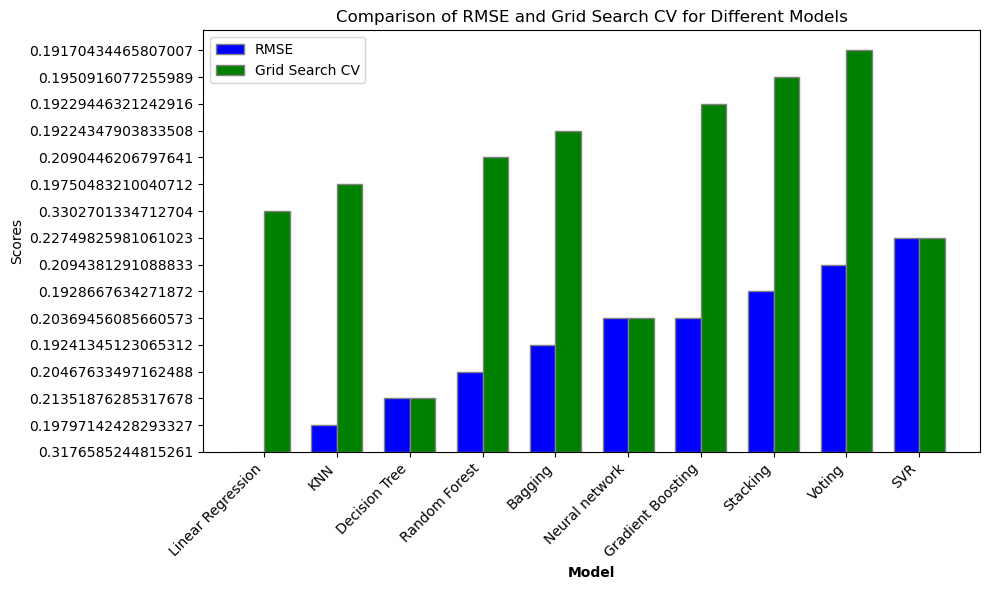

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the positions and width for the bars
barWidth = 0.35
r1 = np.arange(len(Data['model']))
r2 = [x + barWidth for x in r1]

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Create the bars
plt.bar(r1, Data['RMSE'], color='blue', width=barWidth, edgecolor='grey', label='RMSE')
plt.bar(r2, Data['Grid Search CV'], color='green', width=barWidth, edgecolor='grey', label='Grid Search CV')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(Data['model']))], Data['model'], rotation=45, ha='right')

# Add labels, title, and legend
plt.ylabel('Scores')
plt.title('Comparison of RMSE and Grid Search CV for Different Models')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()